# **BHARAT INTERN**

### **Task 2**
Handwritten Number Recognition using MNIST dataset

In [18]:
#Import necessary libraries
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [19]:
# Load MNIST dataset
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [20]:
# Display the shape of the test dataset
X_test.shape

(10000, 28, 28)

In [21]:
# Display the label in the training data set
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

(-0.5, 27.5, 27.5, -0.5)

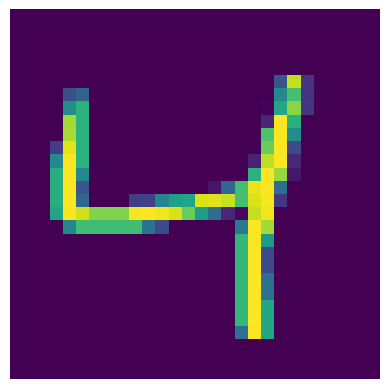

In [22]:
# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Display an image from the training set
plt.imshow(X_train[2])
plt.axis('off')

In [23]:
#Normalize the pixel values to a range between 0 and 1
X_train = X_train/255
X_test = X_test/255

# Display normalized pixel values of the first image
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [24]:
# Create a Sequential model
model = Sequential()

# Add layers to the model
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [25]:
# Display model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 32)                4128      
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Compile the model
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [27]:
# Train the model and store training history
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 2s 964us/step - loss: 0.2813 - accuracy: 0.9187 - val_loss: 0.1401 - val_accuracy: 0.9602
Epoch 2/25
1500/1500 [==============================] - 1s 962us/step - loss: 0.1203 - accuracy: 0.9638 - val_loss: 0.1070 - val_accuracy: 0.9677
Epoch 3/25
1500/1500 [==============================] - 1s 940us/step - loss: 0.0833 - accuracy: 0.9749 - val_loss: 0.1029 - val_accuracy: 0.9679
Epoch 4/25
1500/1500 [==============================] - 1s 962us/step - loss: 0.0636 - accuracy: 0.9803 - val_loss: 0.0920 - val_accuracy: 0.9733
Epoch 5/25
1500/1500 [==============================] - 1s 935us/step - loss: 0.0497 - accuracy: 0.9846 - val_loss: 0.1081 - val_accuracy: 0.9680
Epoch 6/25
1500/1500 [==============================] - 1s 903us/step - loss: 0.0395 - accuracy: 0.9871 - val_loss: 0.0819 - val_accuracy: 0.9778
Epoch 7/25
1500/1500 [==============================] - 1s 929us/step - loss: 0.0315 - accuracy: 0.9904 - val_loss: 0.1006 -

In [28]:
# Make predictions on the test data
y_prob = model.predict(X_test)

313/313 [==============================] - 0s 442us/step


In [29]:
# Get the predicted labels by selecting the class with the highest probability
y_pred = y_prob.argmax(axis=1)

In [30]:
# Import accuracy_score for calculating accuracy
from sklearn.metrics import accuracy_score

# Calculate and display accuracy score
accuracy_score(y_test,y_pred)

0.9789

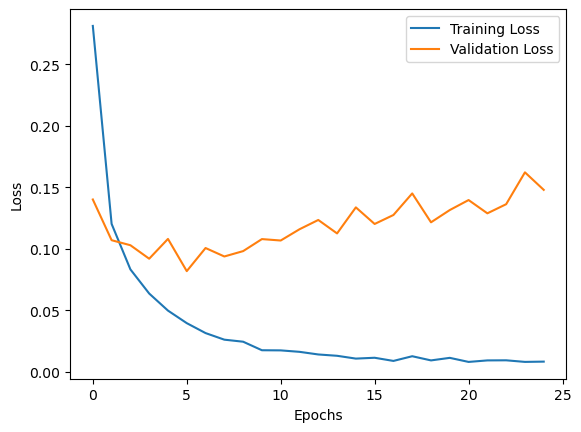

In [31]:
# Plot the training and validation loss over epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

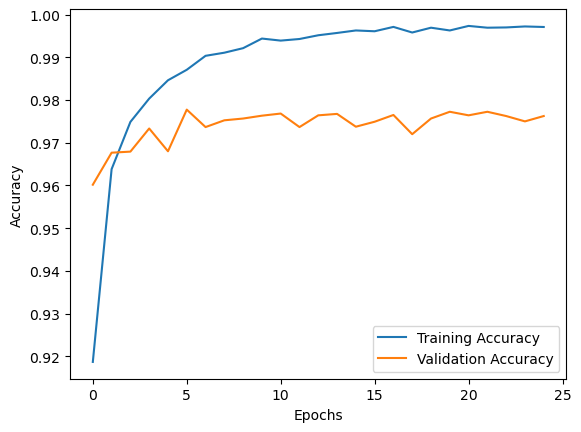

In [32]:
# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()

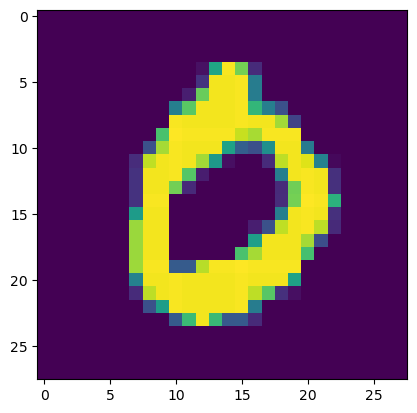

In [33]:
# Display an image from the test set
plt.imshow(X_test[3])

In [34]:
# Make a prediction on a single test image and display the predicted label
model.predict(X_test[3].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 12ms/step


array([0])